In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10) #inna wartość!!

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()
EPOCHS = 100

In [9]:
# Stwórz prostą sieć neuronową. Ile neuronów powinno być w ostatniej warstwie? 1
# Jaka funkcja aktywacji? Do wspólnego zastanowienia. Liniowq
# Jaką funkcję straty wykorzystać podczas kompilacji? Jakie metryki śledzić?
# mse albo mae jako f.straty | a jako metrykę to drugie, co ni ejest naszą f straty
# accuracy nie możemy wyliczyć
# Wytrenuj model.
# Wyświetl wykresy funkcji straty dla zbioru treningowego i walidacyjnego.

In [15]:
x_train.shape

(404, 13)

In [26]:
model = Sequential([
#       13 neuronów wejściowych
        Input(shape = (13,)), 
        Dense(32, activation = 'relu'), 
        Dense(8, activation = 'relu'),
        Dense(1, activation = "linear")
])

In [27]:
model.compile(loss = "mse", optimizer = 'adam', metrics=["mae"])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                448       
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history=  model.fit(x_train, y_train, epochs = EPOCHS, validation_data = (x_test, y_test) , callbacks = [es])
hist = pd.DataFrame(history.history)


Epoch 1/100
13/13 [==============================] - 1s 12ms/step - loss: 15694.1445 - mae: 119.2699 - val_loss: 7811.1270 - val_mae: 83.5795
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 4695.4512 - mae: 62.0176 - val_loss: 2476.5649 - val_mae: 43.7913
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1802.9655 - mae: 38.5877 - val_loss: 1335.8101 - val_mae: 33.3741
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 932.9481 - mae: 26.6330 - val_loss: 622.7701 - val_mae: 21.3527
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 427.8503 - mae: 16.9430 - val_loss: 261.1293 - val_mae: 12.3970
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 197.3645 - mae: 10.9151 - val_loss: 174.8095 - val_mae: 10.2781
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 155.6269 - mae: 9.3160 - val_loss: 144.8098 - val_mae: 9.4448
Epoch 8/100
13/13 [===============

Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 43.2943 - mae: 4.6445 - val_loss: 48.4962 - val_mae: 5.1096
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 43.1692 - mae: 4.6471 - val_loss: 48.7765 - val_mae: 5.0135
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 42.6239 - mae: 4.5642 - val_loss: 48.3597 - val_mae: 5.0003
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 42.6699 - mae: 4.5437 - val_loss: 47.7254 - val_mae: 5.0281
Epoch 66/100
13/13 [==============================] - 0s 3ms/step - loss: 42.0538 - mae: 4.6371 - val_loss: 48.2682 - val_mae: 4.9222
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 41.9726 - mae: 4.5817 - val_loss: 48.3433 - val_mae: 5.0198
Epoch 68/100
13/13 [==============================] - 0s 3ms/step - loss: 41.5117 - mae: 4.4938 - val_loss: 46.7587 - val_mae: 4.9385
Epoch 69/100
13/13 [==============================] - 0s 4ms/s

In [30]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 0s/step


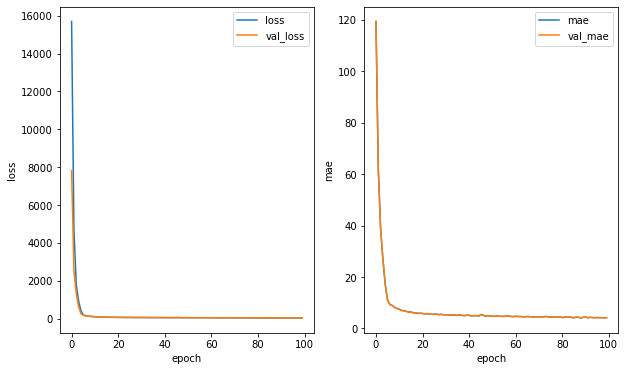

In [33]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.mae, label = "mae")
plt.plot(hist.mae, label = "val_mae")
plt.xlabel("epoch")
plt.ylabel("mae")
plt.legend()

In [32]:
print(f"MSE: {hist.loss}, \n MAE: {hist.mae}")

MSE: 0     15694.144531
1      4695.451172
2      1802.965454
3       932.948120
4       427.850311
          ...     
95       35.000965
96       34.508541
97       34.698292
98       34.905975
99       34.499912
Name: loss, Length: 100, dtype: float64, 
 MAE: 0     119.269928
1      62.017609
2      38.587669
3      26.633026
4      16.943041
         ...    
95      4.232219
96      4.198522
97      4.182731
98      4.167716
99      4.175922
Name: mae, Length: 100, dtype: float64


In [ ]:
# oczywiście - dążymy do jak najmniejszego błędu, manipulujemy warstwami aż wykres będzie jak najbardziej wypłaszczony